Slope of guess:  1.2
Intercept of guess:  0.5
Chi squared of guess:  2.50762102198173
Slope of minimum:  1.47
Intercept of minimum:  0.36
Chi squared of minimum:  0.8647975457609353


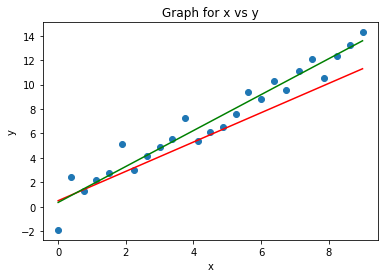

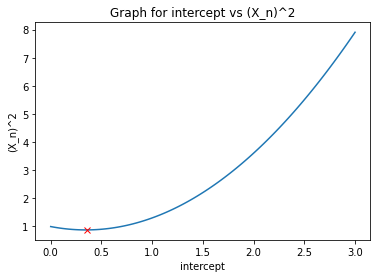

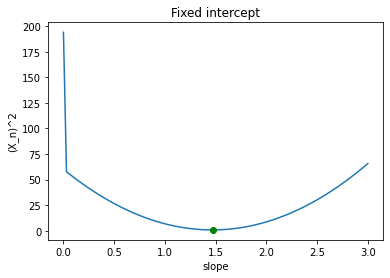

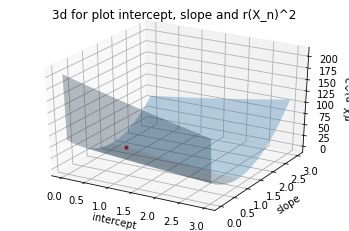

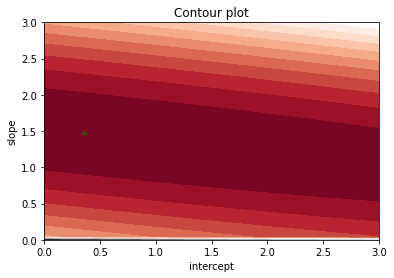

In [ ]:
import matplotlib.pylab as plt
import math
import numpy as np

#function to generate the y values for all the x values
def linear_model(x, param):
  '''for input slope and intercept return $y= m x + b$'''
  slope, intercept = param
  result = slope*x + intercept
  return result

#lists for the x and y values from the data set
x_points = []
y_points = []
#opening the file and reading off the x and y values
with open("data_points_assign5.txt","r") as file_open:
  for pair in file_open:
    x, y = pair.replace("\n","").split("  ")
    x, y = float(x), float(y)
    #putting the read x and y values in their respective lists
    x_points.append(x)
    y_points.append(y)
#generating the line for the guess model
def get_model_list(params):
  model_list=[]
  for x in x_points:
    y_model=linear_model(x,params)
    model_list.append(y_model)
  return model_list

#plotting the graph of the guess line
slope0, intercept0 = 1.2, 0.5
y_model_list = get_model_list((slope0,intercept0))


plt.figure()
plt.plot(x_points, y_model_list,"r")
plt.scatter(x_points,y_points)
plt.title("Graph for x vs y")
plt.xlabel("x")
plt.ylabel("y")

#function to determine the value of reduced chi squared
def reduced_chi_squared(expected,observed,uncertainty=1):
  chi_squared=0
  dict_y=dict(zip(y_model_list,y_points))
  for i in dict_y:
    chi_squared+=(i-dict_y[i])**2
  N=len(dict_y)
  reducedchisquared=chi_squared/N
  return reducedchisquared
#printing the reduced chi squared value of the guess model
print("Slope of guess: ", slope0)
print("Intercept of guess: ", intercept0)
print("Chi squared of guess: ", reduced_chi_squared(y_model_list,y_points))

# The slope of the minimum was sightly larger than the initial guess
# The intercept was slightly below the initial guess
# The chi-squared value for the minimum is expectedly lower than the initial guess

slope_sequence = np.linspace(0.0, 3.0, 101)
intercept_sequence = np.linspace(0.0, 3.0, 101)
rchi2 = np.ndarray(shape=(101, 101))
#scanning a range of values of parameter and slopes
#for which the value of reduced chi squared is minimum
for i in range(len(slope_sequence)):
  for j in range(len(intercept_sequence)):
    y_model_list = get_model_list((slope_sequence[i], intercept_sequence[j]))
    rchi2[i, j] = reduced_chi_squared(y_model_list, y_points)

chi2_min = np.unravel_index(np.argmin(rchi2), rchi2.shape)

#printing the minimum value of reduced chi squared
#to compare with the reduced chi squared of the guess model
print("Slope of minimum: ", slope_sequence[chi2_min[0]])
print("Intercept of minimum: ",  intercept_sequence[chi2_min[1]])
print("Chi squared of minimum: ", rchi2[chi2_min])


#plotting the proper line for the data set
chi2min_line = get_model_list((slope_sequence[chi2_min[0]], intercept_sequence[chi2_min[1]]))

# Fixed slope
plt.plot(x_points, chi2min_line,"g")
plt.xlabel("x")
plt.ylabel("y")
plt.figure()


chi2_fixed_slope = rchi2[chi2_min[0], :]
plt.plot(intercept_sequence, chi2_fixed_slope)
plt.plot(intercept_sequence[chi2_min[1]], chi2_fixed_slope[chi2_min[1]], c="r", marker="x")
plt.title("Graph for intercept vs (X_n)^2")
plt.xlabel("intercept")
plt.ylabel("(X_n)^2")

# Fixed intercept
plt.figure()
chi2_fixed_intercept = rchi2[:, chi2_min[1]]
plt.plot(slope_sequence,chi2_fixed_intercept)
plt.plot(slope_sequence[chi2_min[0]],chi2_fixed_intercept[chi2_min[0]],c="g", marker="o")
plt.title("Fixed intercept")
plt.xlabel("slope")
plt.ylabel("(X_n)^2")

# 3d plot
plt.figure()
xx, yy = np.meshgrid(slope_sequence, intercept_sequence)
ax = plt.subplot(111, projection='3d')
ax.scatter(intercept_sequence[chi2_min[1]], slope_sequence[chi2_min[0]], rchi2[chi2_min], c="r", marker="X", s=10)
ax.plot_surface(xx, yy, rchi2, alpha=0.3)
ax.set_title("3d for plot intercept, slope and r(X_n)^2")
ax.set_xlabel("intercept")
ax.set_ylabel("slope")
ax.set_zlabel("r(X_n)^2")

# Contour plot
plt.figure()
plt.contourf(xx, yy, rchi2, 20, cmap='RdGy')
plt.scatter(intercept_sequence[chi2_min[1]], slope_sequence[chi2_min[0]], s=5, c="g", marker="x")
plt.title("Contour plot")
plt.xlabel("intercept")
plt.ylabel("slope")

plt.show()

